In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import numpy as np
import requests
import time
import png

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

598

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
City_Name_ls = []
City_Number_ls = []
Temperature_ls = []
Humidity_ls = []
Cloudiness_ls = []
Wind_Speed_ls = []
Latitude_ls = []
Longitude_ls = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
    
        City_Name_ls.append(weather_json["name"])
        City_Number_ls.append(weather_json["id"])
        Temperature_ls.append(weather_json['main']['temp'])
        Humidity_ls.append(weather_json['main']['humidity'])
        Cloudiness_ls.append(weather_json["clouds"]["all"])
        Wind_Speed_ls.append(weather_json["wind"]["speed"])
        Latitude_ls.append(weather_json['coord']['lat'])
        Longitude_ls.append(weather_json['coord']['lon'])
    except KeyError:
        continue

In [4]:
Weather_dic = {"City Name":City_Name_ls, "ID":City_Number_ls, "Temperature(°F)":Temperature_ls, "Humidity(%)":Humidity_ls, "Cloudiness(%)":Cloudiness_ls, "Wind Speed(mph)":Wind_Speed_ls, "Latitude":Latitude_ls, "Longitude":Longitude_ls}

In [5]:
Weather_df = pd.DataFrame(Weather_dic)
Weather_df.to_csv("Weather Check API Data")

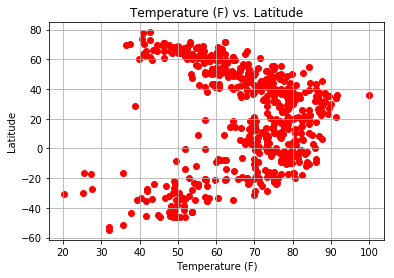

In [19]:
fig = plt.scatter(Temperature_ls, Latitude_ls, color="red")
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid()

plt.savefig('Temperature (F) vs. Latitude.png')
plt.show()

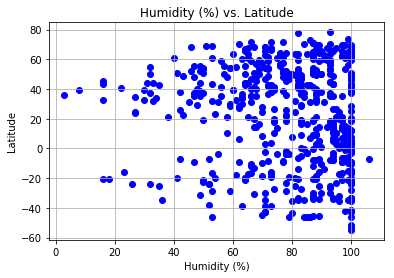

In [20]:
plot = plt.scatter(Humidity_ls, Latitude_ls, color="blue")
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig('Humidity (%) vs. Latitude.png')
plt.show()

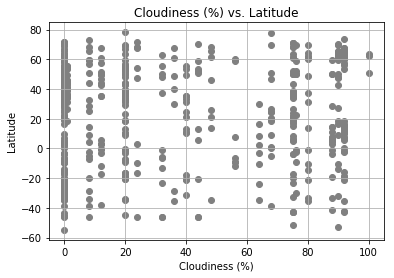

In [21]:
plot = plt.scatter(Cloudiness_ls, Latitude_ls, color="grey")
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig('Cloudiness (%) vs. Latitude.png')
plt.show()

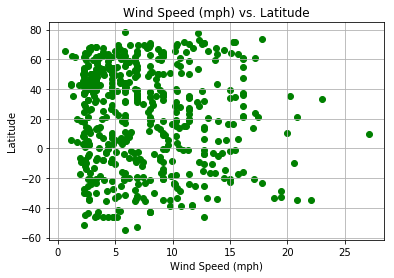

In [22]:
plot = plt.scatter(Wind_Speed_ls, Latitude_ls, color="green")
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig('Wind Speed (mph) vs. Latitude.png')
plt.show()